In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost, shap, math

In [2]:
X,y = shap.datasets.boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [3]:
%time rf_model = RandomForestRegressor().fit(X_train, y_train)

CPU times: user 42.7 ms, sys: 3.08 ms, total: 45.7 ms
Wall time: 46.4 ms


In [4]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
rf_explainer = shap.TreeExplainer(rf_model)
%time rf_shap_values = rf_explainer.shap_values(X)

CPU times: user 482 ms, sys: 2.63 ms, total: 485 ms
Wall time: 484 ms


In [5]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(rf_explainer.expected_value, rf_shap_values[25,:], X.iloc[25,:])

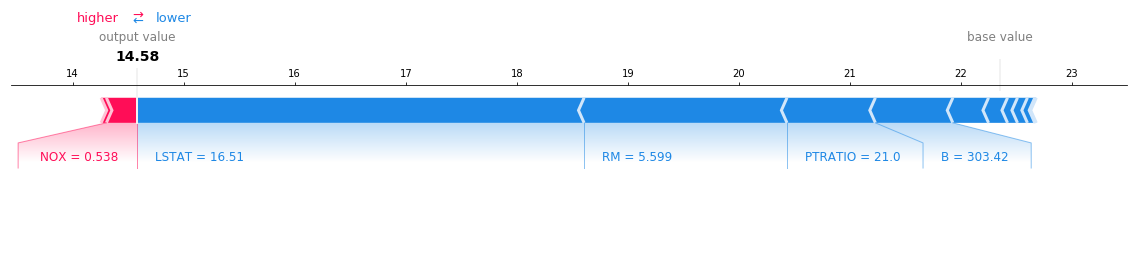

In [6]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(rf_explainer.expected_value, rf_shap_values[25,:], X.iloc[25,:],matplotlib=True)

In [7]:
# visualize the training set predictions
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X)

In [8]:
# visualize the training set predictions
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X,matplotlib=True)

Exception: matplotlib = True is not yet supported for force plots with multiple samples!

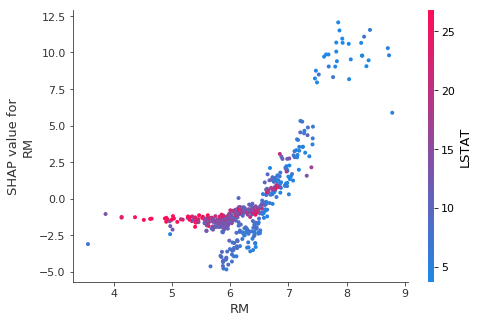

In [9]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", rf_shap_values, X)

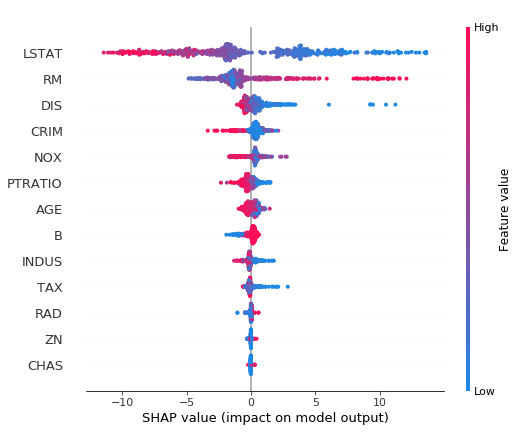

In [11]:
# summarize the effects of all the features
shap.summary_plot(rf_shap_values, X)

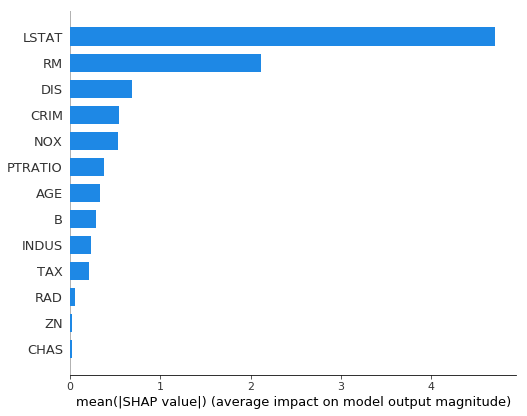

In [12]:
# summarize the effects of all the features
shap.summary_plot(rf_shap_values, X,plot_type='bar')